https://github.com/CuthbertCai/pytorch_DAN

# Importations et Configurations

***N.B. :*** Vérifier avant l'importation des librairies que le type d'accélérateur matériel est bien sur GPU 

Sur Google Collab, Exécution > Modifier le type d'exécution > Accélérateur matériel : **GPU**

In [ ]:
from src.models.extractor import Extractor
from src.models.classifier import Classifier
from src.utils.data_loading import get_train_loader, get_test_loader
from src.utils.losses import mmd_loss
from src.utils.visualization import visualize_loss, visualize_accuracy
from src.config import Config
from src.train import train, test

import torch
import torch.optim as optim
import torch.nn as nn

In [3]:
#à exécuter pour vérifier si cuda est disponible
print(torch.cuda.is_available()) #si TRUE ok
#!nvidia-smi #sinon à éxécuter

True


In [ ]:
# Configuration
config = Config()

# Initialisation des modèles
common_net = Extractor()
src_net = Classifier()
tgt_net = Classifier()

if config.use_gpu:
    common_net.cuda()
    src_net.cuda()
    tgt_net.cuda()

In [ ]:
# Optimiseur et critère
optimizer = optim.SGD([
    {'params': common_net.parameters()},
    {'params': src_net.parameters()},
    {'params': tgt_net.parameters()}], 
    lr=config.lr, momentum=config.momentum)

criterion = nn.CrossEntropyLoss()

# Importation des données

In [ ]:
#!!!!!!!!!!!!!exécution réserver à l'usage de l'importation des dossiers du Drive
# shutil.copytree('/content/drive/MyDrive/M2_MALIA/TER/MNIST_MM', './data/MNIST_M')

# Chargement des données
src_train_dataloader = get_train_loader('MNIST', config.data_root, config.batch_size, config.dataset_mean, config.dataset_std)
tgt_train_dataloader = get_train_loader('MNIST_M', config.data_root, config.batch_size, config.dataset_mean, config.dataset_std)
src_test_dataloader = get_test_loader('MNIST', config.data_root, config.batch_size, config.dataset_mean, config.dataset_std)
tgt_test_dataloader = get_test_loader('MNIST_M', config.data_root, config.batch_size, config.dataset_mean, config.dataset_std)

'./data/MNIST_M'

# Entraînement et évaluation

L'algorithme utilise une méthode de minimisation de la MMD pour minimiser la différence de distribution de données entre les domaines source et cible.
Le code charge les données source et cible en utilisant les fonctions get_train_loader et get_test_loader les divise en ensembles d'apprentissage et de test.
Les réseaux neuronaux communs, source et cible sont définis, suivis des itérateurs de données pour les ensembles d'apprentissage source et cible.
Le code utilise également la bibliothèque TSNE pour visualiser les caractéristiques des images dans un espace bidimensionnel avant et après l'adaptation de domaine.
Ensuite, il définit un optimiseur stochastique de descente de gradient (SGD) et une fonction de perte d'entropie croisée pour entraîner les réseaux neuronaux en minimisant la MMD.
Le code exécute l'apprentissage et l'évaluation de la précision du modèle avec les fonctions train et test, enregistrant les données d'apprentissage et de test dans les dictionnaires train_hist et test_hist.
Enfin, le code visualise les résultats de l'apprentissage et de l'adaptation de domaine en utilisant les données enregistrées dans train_hist et test_hist.

Ici, on utilise la technique t-SNE (t-Distributed Stochastic Neighbor Embedding) pour réduire les représentations de caractéristiques de haute dimension des ensembles de données MNIST et MNIST_M en représentations 2D.
Ensuite, on trace ces représentations 2D dans un nuage de points avec les caractéristiques du domaine source représentées par la couleur rouge et les caractéristiques du domaine cible représentées par la couleur bleue.
Ce graphique permet de visualiser la différence entre les distributions de fonctionnalités des domaines source et cible.
Il s'agit ici d'un scénario d'adaptation de domaine non adapté.

Le tracé montre les représentations des caractéristiques des données des domaines source et cible dans un espace 2D.
Les points rouges représentent les données du domaine source, tandis que les points bleus représentent les données du domaine cible.
Idéalement, après l'adaptation du domaine, les données du domaine cible doivent être bien alignées avec les données du domaine source dans l'espace des fonctionnalités.
Cela signifierait que le modèle s'est adapté avec succès au domaine cible et peut bien fonctionner sur celui-ci.

Par conséquent, le graphique sert d'outil de visualisation pour déterminer si le modèle s'est adapté avec succès au domaine cible ou non.
Si les données du domaine cible sont bien alignées avec les données du domaine source, le modèle s'est adapté avec succès, et si ce n'est pas le cas, le modèle a besoin d'un réglage supplémentaire.


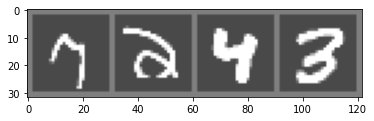

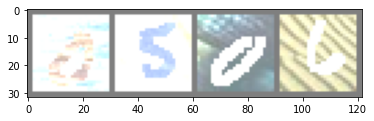

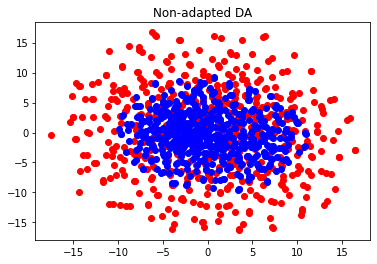

Epoch: 0
[0/59001 (0%)]	Loss: 2.947571	Class Loss: 2.444741	MMD Loss: 0.502830
[512/59001 (1%)]	Loss: 2.489053	Class Loss: 2.246972	MMD Loss: 0.242081
[1024/59001 (2%)]	Loss: 2.068324	Class Loss: 1.924269	MMD Loss: 0.144055
[1536/59001 (3%)]	Loss: 1.848519	Class Loss: 1.701697	MMD Loss: 0.146821
[2048/59001 (3%)]	Loss: 1.664227	Class Loss: 1.516369	MMD Loss: 0.147859
[2560/59001 (4%)]	Loss: 1.618122	Class Loss: 1.471900	MMD Loss: 0.146222
[3072/59001 (5%)]	Loss: 1.468908	Class Loss: 1.323865	MMD Loss: 0.145043
[3584/59001 (6%)]	Loss: 1.369655	Class Loss: 1.190284	MMD Loss: 0.179372
[4096/59001 (7%)]	Loss: 1.318206	Class Loss: 1.146983	MMD Loss: 0.171224
[4608/59001 (8%)]	Loss: 1.261541	Class Loss: 1.041545	MMD Loss: 0.219996
[5120/59001 (9%)]	Loss: 1.182301	Class Loss: 0.962543	MMD Loss: 0.219758
[5632/59001 (10%)]	Loss: 1.117073	Class Loss: 0.906378	MMD Loss: 0.210695
[6144/59001 (10%)]	Loss: 1.076998	Class Loss: 0.877435	MMD Loss: 0.199563
[6656/59001 (11%)]	Loss: 1.063638	Class Loss

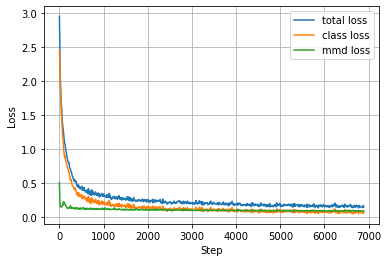

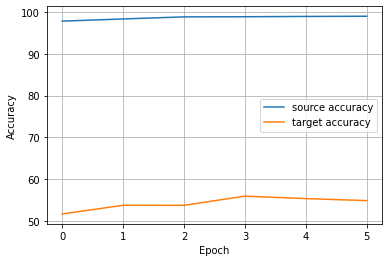

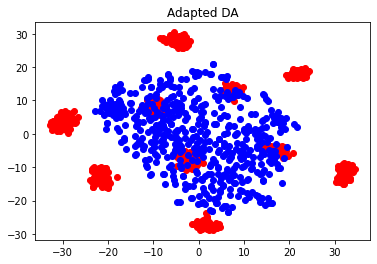

In [ ]:
# Entraînement et évaluation
train_hist = {'Total_loss': [], 'Class_loss': [], 'MMD_loss': []}
test_hist = {'Source Accuracy': [], 'Target Accuracy': []}

for epoch in range(config.epochs):
    common_net, src_net, tgt_net, train_hist = train(
        common_net, src_net, tgt_net, optimizer, criterion, epoch,
        src_train_dataloader, tgt_train_dataloader, train_hist, config)
    
    test_hist = test(
        common_net, src_net, src_test_dataloader, tgt_test_dataloader, 
        epoch, test_hist, config)

# Visualisation
visualize_loss(train_hist, config.plot_iter)
visualize_accuracy(test_hist)




L'adaptation de domaine non adaptée et adaptée sont deux approches utilisées en apprentissage automatique pour résoudre le problème de changement de domaine. Voici les différences entre ces deux approches :

**Adaptation de domaine non adaptée :** dans l'adaptation de domaine non adaptée, le modèle est formé sur le domaine source et directement appliqué au domaine cible sans aucune technique d'adaptation de domaine. Cette approche est simple et facile à mettre en œuvre, mais peut ne pas fonctionner correctement dans le domaine cible en raison du changement de domaine.

**Adaptation de domaine adaptée :** dans l'adaptation de domaine adaptée, le modèle est entraîné sur le domaine source et adapté au domaine cible à l'aide de diverses techniques telles que l'entraînement contradictoire de domaine, l'inversion de gradient ou l'utilisation d'une perte de confusion de domaine. Ces techniques visent à minimiser l'écart de domaine entre les domaines source et cible afin d'améliorer les performances du modèle dans le domaine cible. L'adaptation de domaine adaptée est plus complexe que l'adaptation de domaine non adaptée mais peut conduire à de meilleurs résultats dans le domaine cible.

En résumé, l'adaptation de domaine non adaptée est une approche simple et directe, tandis que l'adaptation de domaine adaptée est plus complexe mais peut conduire à de meilleures performances dans le domaine cible.